## Case Study Project - Travel Insurance 
This document provides all the details you need to complete the case study. We recommend
you read this document carefully before you get started.

## Company Background 
Travel Assured is a travel insurance company. Due to the COVID pandemic, they have had to
cut their marketing budget by over 50%. It is more important than ever that they advertise in
the right places and to the right people.

Travel Assured has plenty of data on their current customers as well as people who got
quotes but never bought insurance.

## Customer Question 
They want to know: \
● Are there differences in the travel habits between customers and non-customers? \
● What is the typical profile of customers and non-customers?

![image](datatype.png)

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
%matplotlib inline
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [112]:
df=pd.read_csv(r'travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [113]:
df.shape

(1987, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [115]:
df['TravelInsurance']=df['TravelInsurance'].astype('bool')
df['ChronicDiseases']=df['ChronicDiseases'].astype('bool')

In [147]:
col=['Employment Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']
for i in df:
    print(f"unique values in {i } are : {df[i].unique()}")

unique values in Age are : [31 34 28 25 33 26 32 29 35 30 27]
unique values in Employment Type are : [' Govt Sector' 'Private/Self Employed']
unique values in GraduateOrNot are : ['Yes' 'No']
unique values in AnnualIncome are : [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
unique values in FamilyMembers are : [6 7 4 3 8 9 5 2]
unique values in ChronicDiseases are : [ True False]
unique values in FrequentFlyer are : ['No' 'Yes']
unique values in EverTravelledAbroad are : ['No' 'Yes']
unique values in TravelInsurance are : [False  True]


In [117]:
df.groupby('Employment Type')['TravelInsurance'].count()

Employment Type
Government Sector                570
Private Sector/Self Employed    1417
Name: TravelInsurance, dtype: int64

In [118]:
df.groupby('Employment Type')['TravelInsurance'].sum()

Employment Type
Government Sector               140
Private Sector/Self Employed    570
Name: TravelInsurance, dtype: int64

In [137]:
df['Employment Type']=df['Employment Type'].map({"Government Sector":" Govt Sector","Private Sector/Self Employed":"Private/Self Employed"})

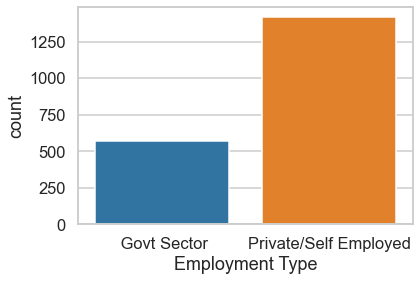

In [138]:
sns.countplot(x='Employment Type',data=df)
plt.show()

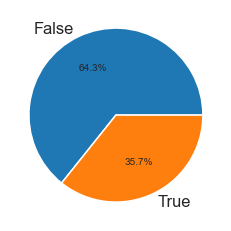

False    0.642677
True     0.357323
Name: TravelInsurance, dtype: float64

In [158]:
plt.pie(df['TravelInsurance'].value_counts().values/df['TravelInsurance'].count(),labels=["False","True"],autopct='%1.1f%%')
plt.show()
df['TravelInsurance'].value_counts()/df['TravelInsurance'].count()

**obs1** 
The dataset has more details of non customers than customers

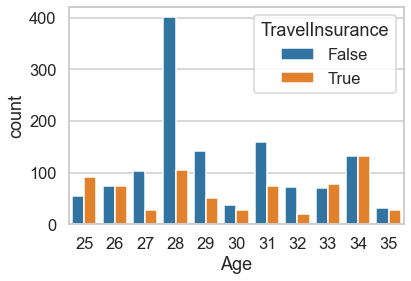

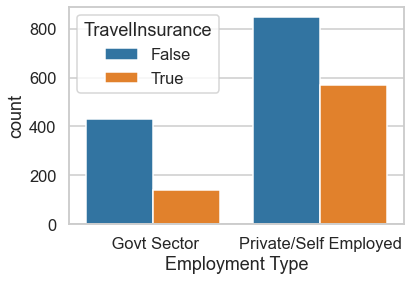

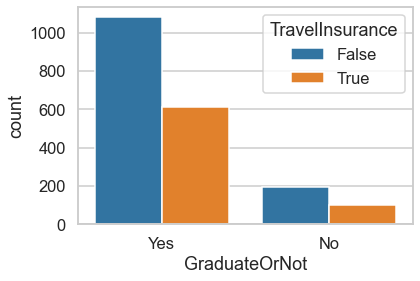

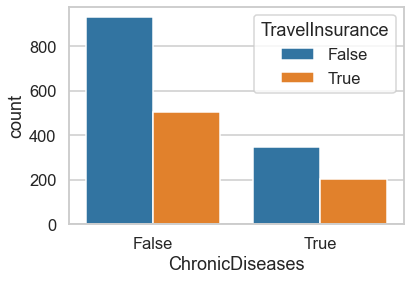

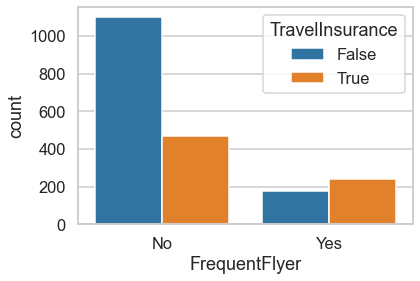

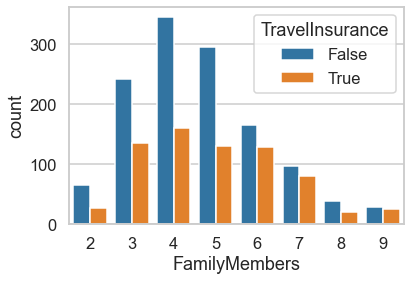

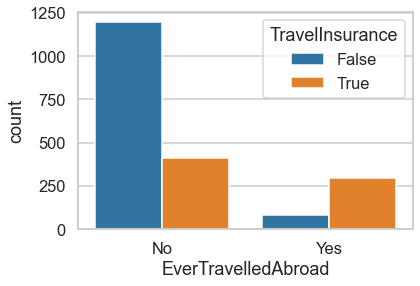

<Figure size 432x288 with 0 Axes>

In [139]:
for x in col:
    sns.countplot(x=x,data=df,hue='TravelInsurance')

    plt.show()
    plt.clf()
    

In [163]:
df.groupby(['FrequentFlyer','TravelInsurance'])['FrequentFlyer'].count()

FrequentFlyer  TravelInsurance
No             False              1099
               True                471
Yes            False               178
               True                239
Name: FrequentFlyer, dtype: int64

In [162]:
df.groupby('FrequentFlyer')['FrequentFlyer'].count()

FrequentFlyer
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

In [149]:
df.groupby(['FrequentFlyer','TravelInsurance'])['FrequentFlyer'].count() / df.groupby('FrequentFlyer')['FrequentFlyer'].count()

FrequentFlyer  TravelInsurance
No             False              0.700000
               True               0.300000
Yes            False              0.426859
               True               0.573141
Name: FrequentFlyer, dtype: float64

* We can clearly say that if a person Frequent Flyer, the probability of buying travel insurance is greater.

In [151]:
df.groupby(['EverTravelledAbroad','TravelInsurance'])['EverTravelledAbroad'].count() / df.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()

EverTravelledAbroad  TravelInsurance
No                   False              0.743622
                     True               0.256378
Yes                  False              0.215789
                     True               0.784211
Name: EverTravelledAbroad, dtype: float64

* We can clearly say that if a person travelled abroad, the probability of buying travel insurance is greater.

In [159]:
for i in col:
    print(df.groupby([i,'TravelInsurance'])[i].count() / df.groupby(i)[i].count())

Employment Type        TravelInsurance
 Govt Sector           False              0.754386
                       True               0.245614
Private/Self Employed  False              0.597742
                       True               0.402258
Name: Employment Type, dtype: float64
GraduateOrNot  TravelInsurance
No             False              0.664407
               True               0.335593
Yes            False              0.638889
               True               0.361111
Name: GraduateOrNot, dtype: float64
ChronicDiseases  TravelInsurance
False            False              0.648084
                 True               0.351916
True             False              0.628623
                 True               0.371377
Name: ChronicDiseases, dtype: float64
FrequentFlyer  TravelInsurance
No             False              0.700000
               True               0.300000
Yes            False              0.426859
               True               0.573141
Name: FrequentFlyer, dtype

**obs2** 

characteristics of customer
* More number of customers are self employed or work in private sector
* More number of customers are graduates
* those who do not have chronic diseases are more likely to become customer
* Frequent flyers are more likely to be customers
* Those who Ever travelled abroad are more likely to be come customer

characteristics of non customer
* More number of non customers are self employed or work in private sector
* More number of non customers are graduate
* Those who do not have chronic diseases are non customers
* Non frequent flyers are more likely to be non customers
* Those who have not Ever travelled abroad are more likely to be come non customer

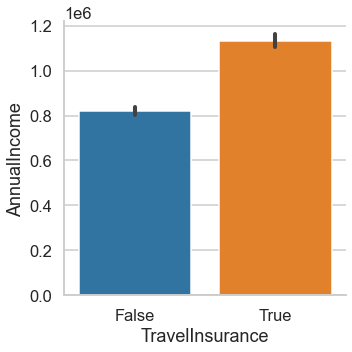

In [122]:
sns.catplot(x='TravelInsurance',y="AnnualIncome",data=df,kind="bar")

plt.show()


**obs3** 
* Average income of those customers is more than the non customers

<AxesSubplot:xlabel='TravelInsurance', ylabel='FamilyMembers'>

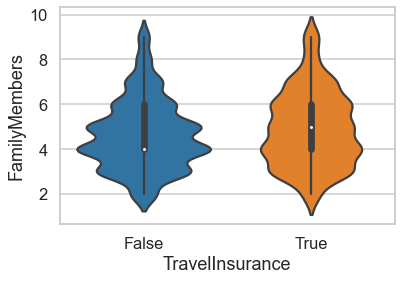

In [123]:
sns.violinplot(data=df, x='TravelInsurance',\
y="FamilyMembers")

<AxesSubplot:xlabel='TravelInsurance', ylabel='Age'>

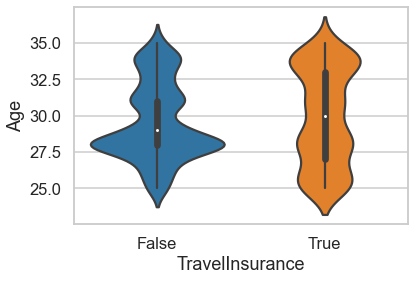

In [124]:
sns.violinplot(data=df, x='TravelInsurance',\
y="Age")

<AxesSubplot:xlabel='TravelInsurance', ylabel='Age'>

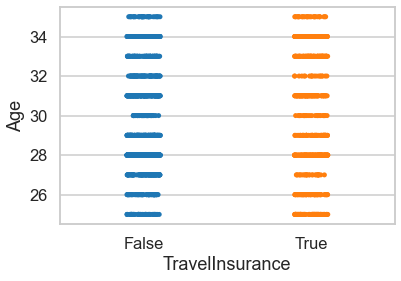

In [125]:
sns.stripplot(data=df, x='TravelInsurance',\
y="Age")

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncome'>

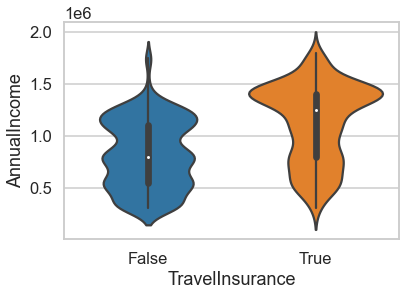

In [126]:
sns.violinplot(data=df, x='TravelInsurance',\
y="AnnualIncome")

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncome'>

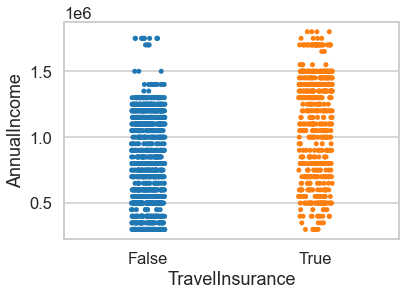

In [127]:
sns.stripplot(data=df, x='TravelInsurance',\
y="AnnualIncome")

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncome'>

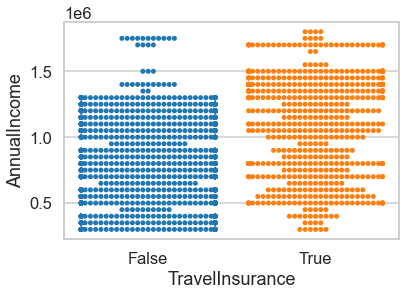

In [128]:
sns.swarmplot(data=df, x='TravelInsurance',\
y="AnnualIncome")

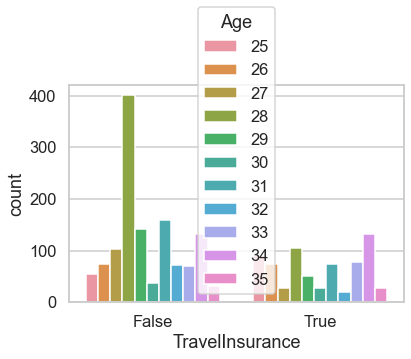

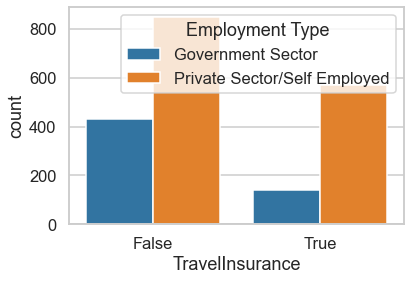

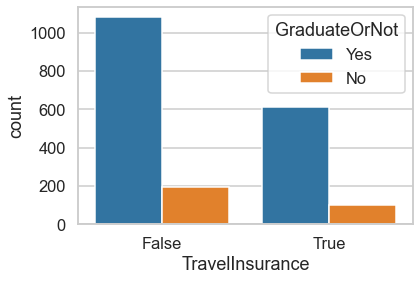

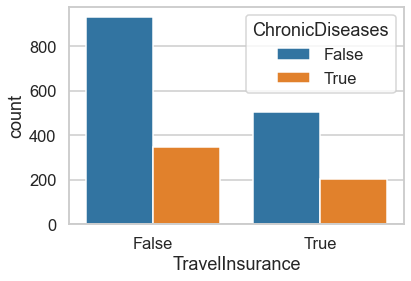

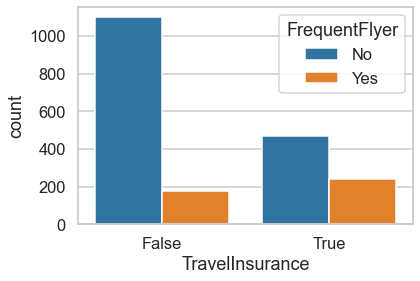

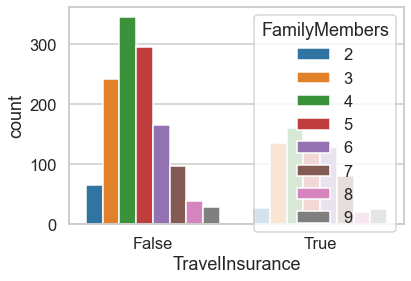

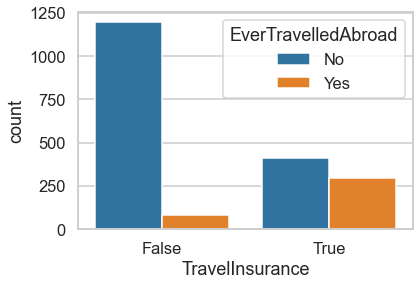

<Figure size 432x288 with 0 Axes>

In [129]:
for x in col:
    sns.countplot(x='TravelInsurance',data=df,hue=x)

    plt.show()
    plt.clf()
    

In [130]:
df.groupby('TravelInsurance')[['Age','AnnualIncome','FamilyMembers']].agg([np.mean,np.median,np.std])

Age                   AnnualIncome             \
                      mean median       std          mean     median   
TravelInsurance                                                        
False            29.517619   29.0  2.644396  8.212999e+05   800000.0   
True             29.888732   30.0  3.331732  1.133239e+06  1250000.0   

                               FamilyMembers                   
                           std          mean median       std  
TravelInsurance                                                
False            328898.896970      4.657009    4.0  1.562634  
True             374844.677369      4.925352    5.0  1.678304

In [148]:
df.groupby(['TravelInsurance'])[col].describe()

Employment Type                                     \
                          count unique                    top freq   
TravelInsurance                                                      
False                      1277      2  Private/Self Employed  847   
True                        710      2  Private/Self Employed  570   

                GraduateOrNot                   ChronicDiseases                \
                        count unique  top  freq           count unique    top   
TravelInsurance                                                                 
False                    1277      2  Yes  1081            1277      2  False   
True                      710      2  Yes   611             710      2  False   

                     FrequentFlyer                  EverTravelledAbroad  \
                freq         count unique top  freq               count   
TravelInsurance                                                           
False            930          1277      2  No  1099                1277   
True             505           710      2  No   471                 710   

                                  
                unique top  freq  
TravelInsurance                   
False                2  No  1195  
True                 2  No   412

<AxesSubplot:xlabel='TravelInsurance', ylabel='Age'>

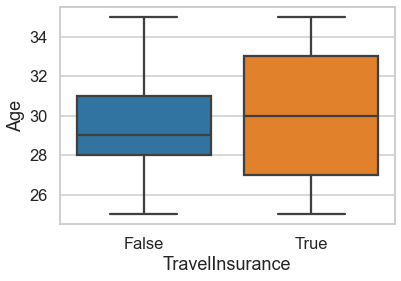

In [131]:
sns.boxplot(data=df,x="TravelInsurance",y="Age")

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncome'>

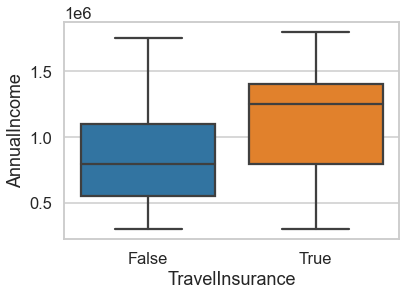

In [132]:
sns.boxplot(data=df,x="TravelInsurance",y="AnnualIncome")

<AxesSubplot:xlabel='TravelInsurance', ylabel='FamilyMembers'>

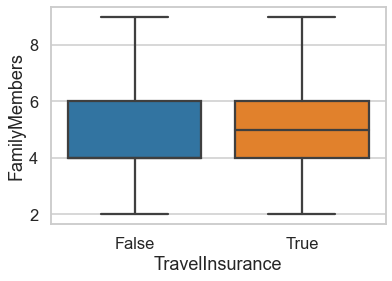

In [133]:
sns.boxplot(data=df,x="TravelInsurance",y="FamilyMembers")

In [143]:
df.groupby('TravelInsurance').describe()

Age                                                     \
                  count       mean       std   min   25%   50%   75%   max   
TravelInsurance                                                              
False            1277.0  29.517619  2.644396  25.0  28.0  29.0  31.0  35.0   
True              710.0  29.888732  3.331732  25.0  27.0  30.0  33.0  35.0   

                AnnualIncome                ...                        \
                       count          mean  ...        75%        max   
TravelInsurance                             ...                         
False                 1277.0  8.212999e+05  ...  1100000.0  1750000.0   
True                   710.0  1.133239e+06  ...  1400000.0  1800000.0   

                FamilyMembers                                               
                        count      mean       std  min  25%  50%  75%  max  
TravelInsurance                                                             
False                  1277.0  4.657009  1.562634  2.0  4.0  4.0  6.0  9.0  
True                    710.0  4.925352  1.678304  2.0  4.0  5.0  6.0  9.0  

[2 rows x 24 columns]

In [164]:
df.groupby('TravelInsurance')['AnnualIncome'].agg([np.mean,np.median,np.std])

,mean,median,std
TravelInsurance,,,
False,8.212999e+05,800000.0,328898.896970
True,1.133239e+06,1250000.0,374844.677369


## Summary:
**observations:** 

* The dataset has more details of non customers. 64.3% do not buy travel insurance 
* Private sector or self employed buy more travel insurance as compared to govt sector
* Frequent Flyers have higher probability of purchasing Travel insurance 
* Those who travelled abroad have more probablity of buying Travel insurance
* The average and median income of customers are more than the non customers
* Age is not an important factor to determine wheather the person will be customer or non customer
* Family members do not determine the buying probability
* Having Chronic disease does not determine the buying probability